In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Model Data.csv', header=1)

df = df.drop(columns=['Month', 'DOW'])

In [3]:
# detect continuous features
continuous_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# detect categorical features
categorical_cols = df.select_dtypes(include=[object, bool]).columns.tolist()

# remove the response variable, assuming it's in a column named `y`
continuous_cols.remove('Avg conversions per user')

In [4]:
# define the transformers
transformers = [
    ('continuous', StandardScaler(), continuous_cols),
    ('categorical', 'passthrough', categorical_cols)
]

# create a column transformer with the defined transformers
ct = ColumnTransformer(transformers)

# fit the column transformer to the DataFrame
ct.fit(df)

# apply the column transformer to the DataFrame
df_scaled = ct.transform(df)

# convert the transformed array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=continuous_cols + categorical_cols)

# Fit the Model

In [5]:
X = df_scaled
# X = df.drop(columns=['Avg conversions per user'])
y = df['Avg conversions per user']

In [6]:
alpha = 0.1  # regularization parameter
model = Ridge(alpha=alpha)
model.fit(X, y)

Ridge(alpha=0.1)

In [7]:
coef = model.coef_
names = X.columns

coef_df = pd.DataFrame({'Variable': names, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coef_df.to_string(index=False))

                                             Variable  Coefficient
                                          Event count     0.299154
                                                Views    -0.236816
                        Active Users Trending (1 Day)    -0.234816
                                           URL (/   )     0.096556
                      Active Users Trending (30 Days)    -0.039397
             Page (Marathon Key Restaurants | Dining)    -0.032341
              Page (Reservations - Room Availability)     0.030981
                  Page (Reservations - Guest Details)    -0.028779
                                               Chrome     0.021518
Page (Reservations - Room Availability for Next Room)     0.020678
                                      Android Webview     0.020088
                                 Page (Title Not Set)     0.016654
                  Average engagement time per session     0.014261
                          URL (/marathon-hotel-deals)     0.01

In [8]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 0.01


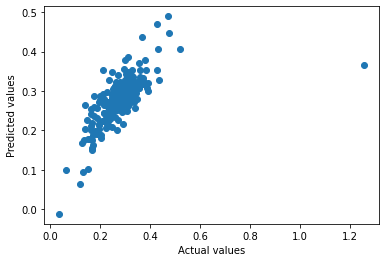

In [9]:
plt.scatter(y, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

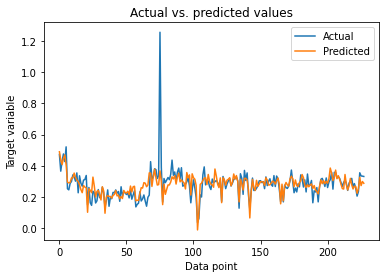

In [10]:
plt.plot(y.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data point')
plt.ylabel('Target variable')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

In [13]:
coef_df.iloc[0]['Variable']

'Event count'

In [ ]:
# df = pd.read_csv('Model Data.csv', header=1)
# continuous_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# categorical_cols = df.select_dtypes(include=[object, bool]).columns.tolist()
# continuous_cols.remove('Avg conversions per user')
# transformers = [
#     ('continuous', StandardScaler(), continuous_cols),
#     ('categorical', 'passthrough', categorical_cols)
# ]
# ct = ColumnTransformer(transformers)
# ct.fit(df)
# df_scaled = ct.transform(df)
# df_scaled = pd.DataFrame(df_scaled, columns=continuous_cols + categorical_cols)
# X = df_scaled
# y = df['Avg conversions per user']
# alpha = 0.1  # regularization parameter
# model = Ridge(alpha=alpha)
# model.fit(X, y)
# coef = model.coef_
# names = X.columns
# coef_df = pd.DataFrame({'Variable': names, 'Coefficient': coef})
# coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
# y_pred = model.predict(X)
# mse = mean_squared_error(y, y_pred)